In [2]:
# ffe_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1.ffe'

# def read_ffe_file(file_path):
#     try:
#         with open(file_path, 'r') as file:
#             contents = file.readlines()
#             return contents[:100]     # 처음 10줄을 반환
#     except Exception as e:
#         return str(e)               # 출력

# read_ffe_file(ffe_path)

['##File Type: Far field\n',
 '##File Format: 7\n',
 '##Source: AH-1_LE-PO_8GHz_3D\n',
 '##Date: 2024-05-26 11:10:45\n',
 '** File exported by POSTFEKO version 2019.3.3-373003 (x64)\n',
 '\n',
 '#Configuration Name: StandardConfiguration1\n',
 '#Request Name: FarField1\n',
 '#Frequency: 8.00000000E+9\n',
 '#Coordinate System: Spherical\n',
 '#No. of Theta Samples: 181\n',
 '#No. of Phi Samples: 361\n',
 '#Result Type: RCS\n',
 '#Incident Wave Direction: (0.00000000E+0, 0.00000000E+0)\n',
 '#No. of Header Lines: 1\n',
 '#                 "U"               "V"               "Re(Eu)"          "Im(Eu)"          "Re(Ev)"          "Im(Ev)"          "RCS(U)"          "RCS(V)"          "RCS(Total)"      \n',
 '                    0.00000000E+0     0.00000000E+0    -4.85110198E+1    -2.59280597E+1    -1.95383806E-1    -2.15064875E-1     3.80206013E+4     1.06095017E+0     3.80216623E+4   \n',
 '#Configuration Name: StandardConfiguration1\n',
 '#Request Name: FarField1\n',
 '#Frequency: 8.000000

In [5]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# ffe 파일에서 필요한 고각, 방위각, RCS값을 추출한 후 csv파일로 생성

# 경로는 필요에 맞게 알맞게 수정

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1_Test2.csv'

def process_and_save_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = int(float(parts[0]))  # U 고각
            azimuth = int(float(parts[1]))  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in range(181):  # Elevation angles from 0 to 180 degrees
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

In [4]:
# 0도부터 180도까지만의 데이터가 있는 경우

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_1_9GHz.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_1_9GHz_FFE.csv'

def process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = float(parts[0])  # U 고각
            azimuth = float(parts[1])  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    # 이 부분만 181~360도 데이터 처리 부분 추가
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in sorted(rcs_data.keys()):  # Elevation angles
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                if az <= 180:
                    rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                else:
                    rcs_value = rcs_data.get(el, {}).get(360 - az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

# Process the FFE file and save the output to CSV with symmetric azimuth angles
process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

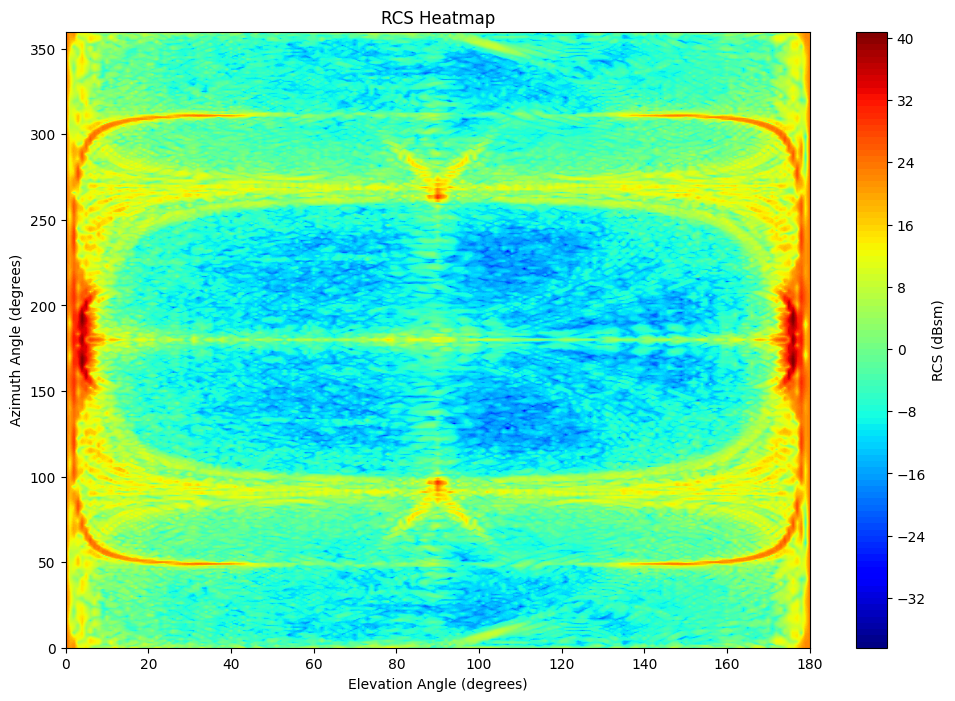

In [6]:
# 합쳐진 결과물 csv 파일을 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_1_9GHz_FFE.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Azimuth Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

In [3]:
# 행이 고각으로, 열이 방위각으로 구성된 csv 데이터파일을 생성
# 파일 이름은 알맞게 변경
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/AH-1_PO_3D_PEC_1_FFE.csv'
new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/AH1/NEW_AH-1_PO_3D_PEC_1_FFE.csv'
data = pd.read_csv(input_file_path)

# 데이터를 pivot하여 새로운 형태로 재구성
pivoted_data = data.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# 재구성된 데이터를 CSV 파일로 저장
pivoted_data.to_csv(new_file_path, header=False, index=False)

pivoted_data.head()

Azimuth Angle (degrees),0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0,45.800311,45.802147,45.803894,45.805550,45.807114,45.808583,45.809956,45.811231,45.812407,45.813483,...,45.780182,45.782708,45.785169,45.787560,45.789880,45.792125,45.794293,45.796382,45.798389,45.800311
1,30.825701,30.919234,30.992705,31.075727,31.155580,31.248118,31.355623,31.471600,31.560767,31.697946,...,29.218060,29.358920,29.679158,29.933154,30.050938,30.246786,30.431890,30.603224,30.738108,30.825701
2,35.695764,35.600853,35.443433,35.270375,35.108544,34.839350,34.486781,34.103920,33.663096,33.120994,...,34.560611,35.019307,35.335521,35.579089,35.714697,35.778402,35.822538,35.825921,35.758079,35.695764
3,25.775503,25.964439,25.971456,26.036965,26.044547,26.048514,25.821340,25.743737,25.544980,24.133963,...,21.830804,23.427288,23.806355,23.817709,23.838002,24.062342,24.530289,25.102623,25.423928,25.775503
4,20.585538,20.267779,20.280701,20.254416,20.144665,19.559597,17.676459,13.376048,5.825712,12.230769,...,18.172085,14.378061,14.317329,18.279179,20.886753,22.056455,22.305402,21.608327,21.315359,20.585538
